In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [5]:
img_width=180
img_height=180

In [6]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


In [7]:
data_cat = data_train.class_names

In [9]:
print(data_cat)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [18]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_height,img_width),
    batch_size=32,
    shuffle=False,
    validation_split=False
)

Found 351 files belonging to 36 classes.


In [19]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


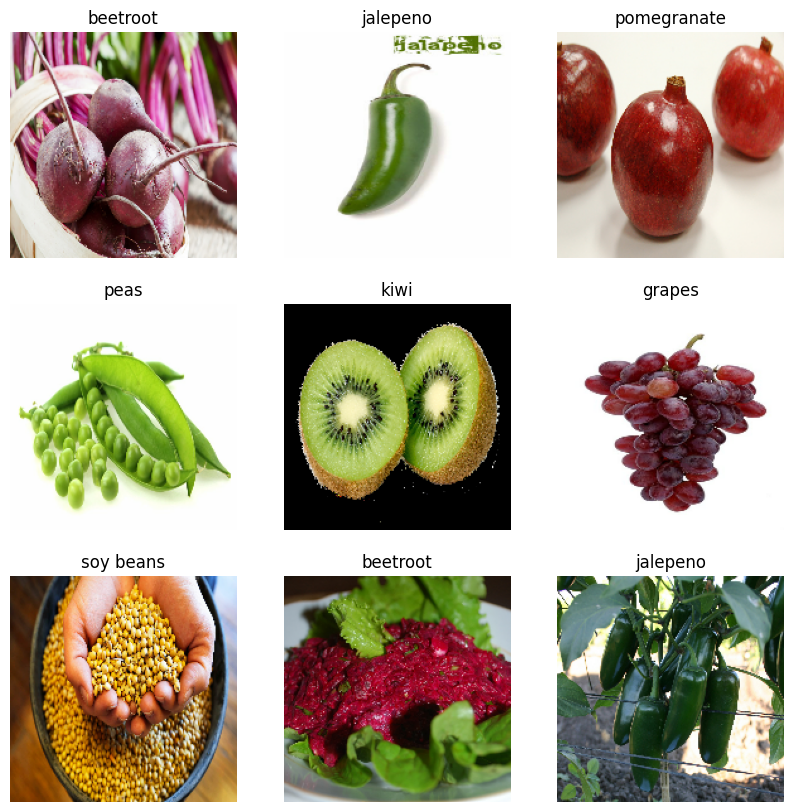

In [21]:
plt.figure(figsize=(10,10))
for image,labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [29]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [30]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [31]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 54s 524ms/step - accuracy: 0.0857 - loss: 3.5179 - val_accuracy: 0.4758 - val_loss: 2.1136
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 423ms/step - accuracy: 0.3381 - loss: 2.2711 - val_accuracy: 0.6667 - val_loss: 1.3291
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 381ms/step - accuracy: 0.5231 - loss: 1.6716 - val_accuracy: 0.8177 - val_loss: 0.7510
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 39s 392ms/step - accuracy: 0.7350 - loss: 0.9805 - val_accuracy: 0.9231 - val_loss: 0.4317
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 402ms/step - accuracy: 0.8647 - loss: 0.5079 - val_accuracy: 0.9231 - val_loss: 0.4297
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 49s 500ms/step - accuracy: 0.9241 - loss: 0.3143 - val_accuracy: 0.9402 - val_loss: 0.3682
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 47s 473ms/step - accuracy: 0.9479 - loss: 0.2180 - val_accuracy: 0.9459 - val_loss: 0.3714
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 49s 492ms/step - accuracy: 0.9641 - loss: 0.1572 - val_accu

Text(0.5, 1.0, 'Loss')

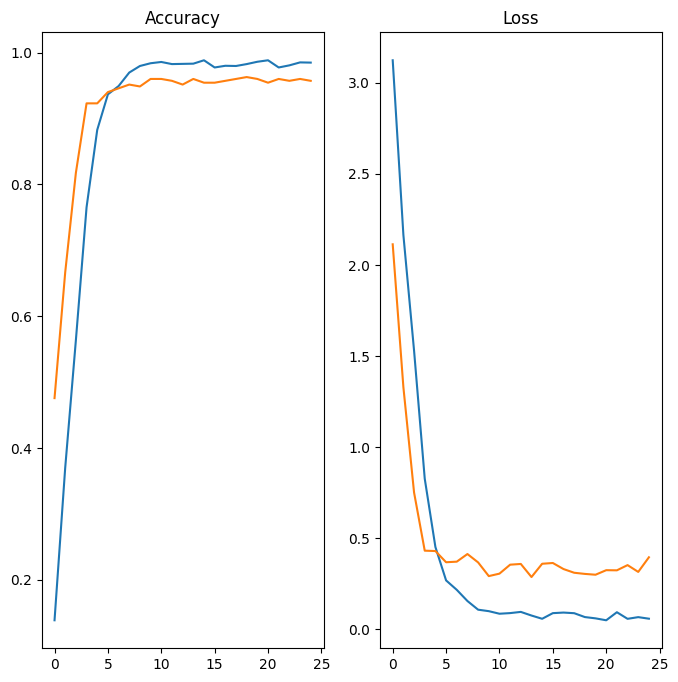

In [32]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [93]:
image = 'grapes.jpeg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [94]:
predict = model.predict(img_bat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


In [95]:
score = tf.nn.softmax(predict)

In [96]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is grapes with accuracy of 99.94


In [97]:
model.save('Image_classify.keras')